#### Imports

In [17]:
import pandas as pd
import seaborn as srn
import statistics as sts
import warnings
warnings.filterwarnings('ignore')

#### Importar dados

In [2]:
dataset = pd.read_csv('..\..\data\Churn.csv', sep=';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


#### Tamanho

In [3]:
dataset.shape

(999, 12)

#### Dando nome as colunas

In [4]:
dataset.columns = ['Id', 'Score', 'Estado', 'Gênero', 'Idade', 'Patrimômio', 'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 'Salário', 'Saiu']
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimômio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


## Explorar dados categóricos

#### Estado

In [5]:
grouping = dataset.groupby(['Estado']).size()
grouping

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot: xlabel='Gênero'>

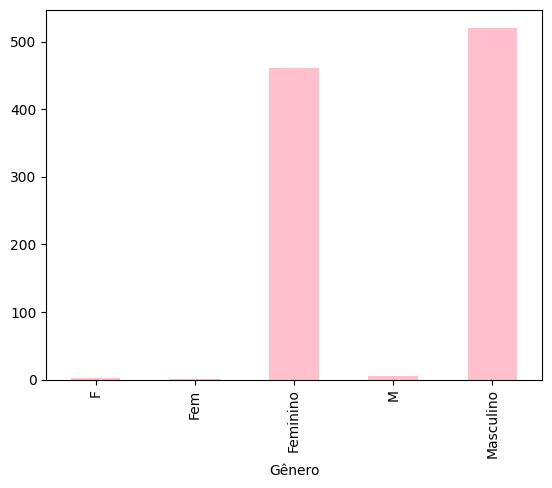

In [18]:
grouping.plot.bar(color='pink')

#### Gênero

In [19]:
grouping = dataset.groupby(['Gênero']).size()
grouping

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot: xlabel='Gênero'>

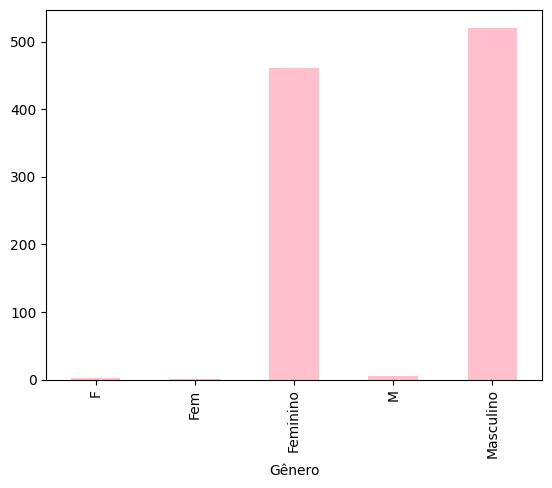

In [20]:
grouping.plot.bar(color='pink')

## Explorar colunas numéricas

#### Score

In [10]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

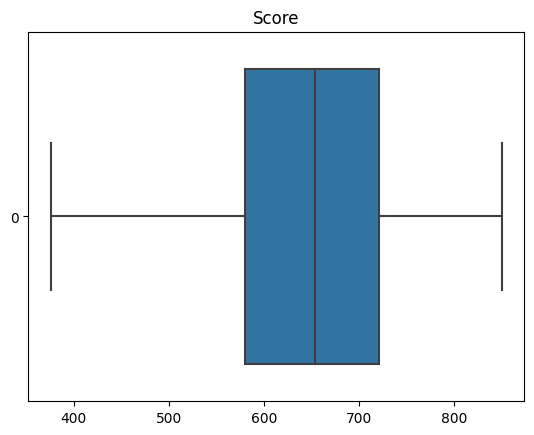

In [48]:
srn.boxplot(dataset['Score'], orient='h').set_title('Score')

Text(0.5, 1.0, 'Score')

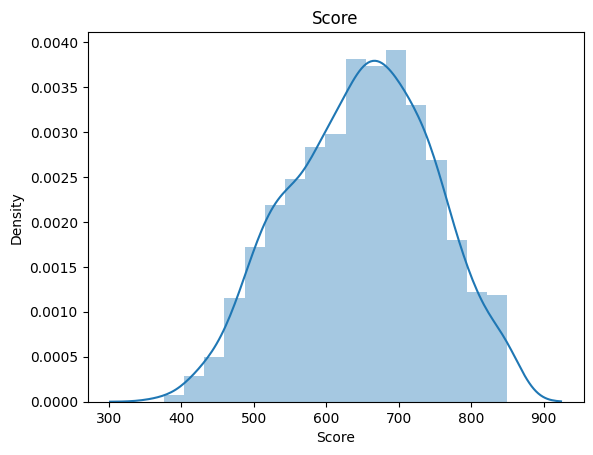

In [29]:
srn.distplot(dataset['Score']).set_title('Score')

#### Idade

In [23]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

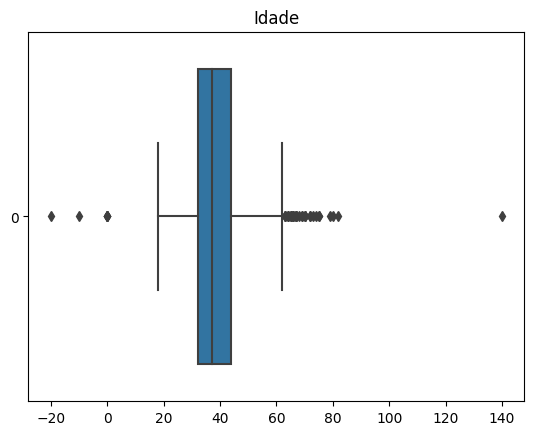

In [47]:
srn.boxplot(dataset['Idade'], orient='h').set_title('Idade')

Text(0.5, 1.0, 'Idade')

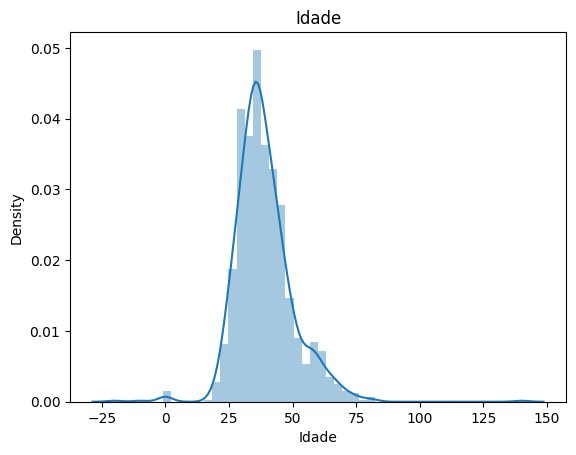

In [28]:
srn.distplot(dataset['Idade']).set_title('Idade')

#### Saldo

In [34]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

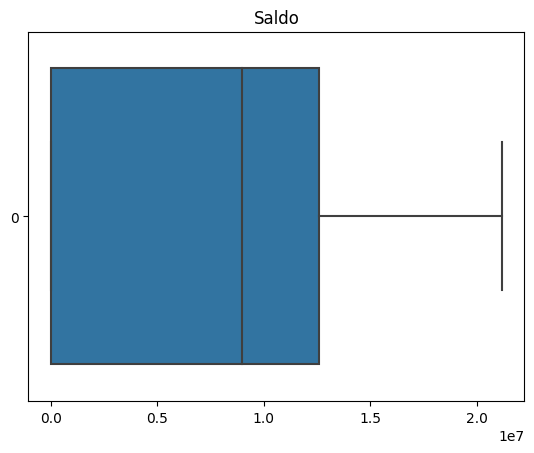

In [46]:
srn.boxplot(dataset['Saldo'], orient='h').set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

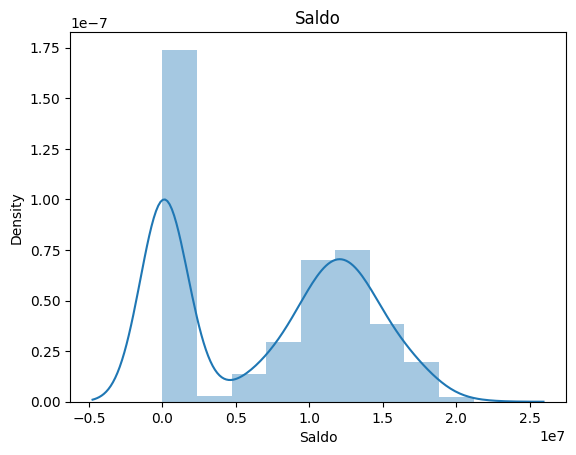

In [40]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

#### Salário

In [42]:
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

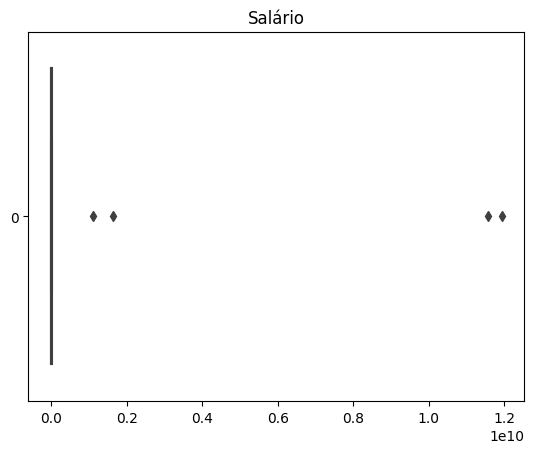

In [45]:
srn.boxplot(dataset['Salário'], orient='h').set_title('Salário')

Text(0.5, 1.0, 'Salário')

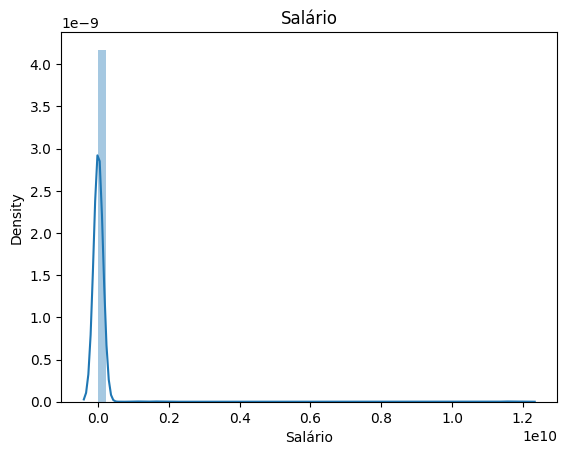

In [44]:
srn.distplot(dataset['Salário']).set_title('Salário')

## Contando os valores NaN

#### Gênero e salário

In [49]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Gênero            8
Idade             0
Patrimômio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

## Correção dos erros identificados

#### Remover NaNs e substituir por mediana - Salário

In [50]:
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

In [51]:
median = sts.median(dataset['Salário'])
median

70518.0

#### Substituir NaN por mediana

In [52]:
dataset['Salário'].fillna(median, inplace=True)

#### Verificando novamente NaNs de salário

In [53]:
dataset['Salário'].isnull().sum()

0

#### Gênero, Falta de padronizaçãp e NaN

In [56]:
grouping =  dataset.groupby(['Gênero']).size()
grouping

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [57]:
dataset['Gênero'].isnull().sum()

8

#### Subtituir os NaNs pela pela moda (Masculino)

In [58]:
dataset['Gênero'].fillna('Masculino', inplace=True)

#### Verificando novamente NaNs Gênero

In [59]:
dataset['Gênero'].isnull().sum()

0

#### Padronizar gênero de acordo com o domíno

In [61]:
dataset.loc[dataset['Gênero'] == 'M', 'Gênero'] = 'Masculino'
dataset.loc[dataset['Gênero'].isin(['Fem', 'F']), 'Gênero'] = 'Feminino'
grouping = dataset.groupby(['Gênero']).size()
grouping

Gênero
Feminino     464
Masculino    535
dtype: int64

#### Idades fora do domínio

In [62]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

#### Visualizar valores fora do domínio 0-120

In [63]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Gênero,Idade,Patrimômio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


#### Calcular mediana

In [66]:
median = sts.median(dataset['Idade'])
median

37

#### Substituir idades por mediana (37)

In [67]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = median

#### Verificando idade novamente

In [68]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Gênero,Idade,Patrimômio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


#### Dados duplicados, buscados pelo ID

In [69]:
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Gênero,Idade,Patrimômio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


#### Excluindo pelo ID

In [70]:
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)

#### Verificando duplicidade novamente

In [71]:
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Gênero,Idade,Patrimômio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


#### Estado fora do domínio

In [76]:
grouping = dataset.groupby(['Estado']).size()
grouping

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

#### Substituindo dados errados pela moda (RS)

In [77]:
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'

#### Verificando domínio dos estados novamente

In [78]:
grouping = dataset.groupby(['Estado']).size()
grouping

Estado
PR    257
RS    483
SC    258
dtype: int64

#### Outliers em salário,  vamos considerar dois desvios padrão

In [80]:
desv = sts.stdev(dataset['Salário'])
desv

528988918.4679201

##### definindo  padrão como maior que 2 e checanmos se algum atende o critério

In [81]:
dataset.loc[dataset['Salário'] >= 2 * desv]

,Id,Score,Estado,Gênero,Idade,Patrimômio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


#### Calcular a mediana para atualizar os salários

In [82]:
median = sts.median(dataset['Salário'])
median

8637195.5

#### Substituindo valores fora do domínio por mediana (8637195.5)

In [83]:
dataset.loc[dataset['Salário'] >= 2 * desv, 'Salário'] = median

#### Verificando os valores novamente

In [84]:
dataset.loc[dataset['Salário'] >= 2 * desv]

,Id,Score,Estado,Gênero,Idade,Patrimômio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


In [85]:
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimômio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [86]:
dataset.shape

(998, 12)